In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Jupyter Notebook Research Code/IPL Prediction /matches.csv")
data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
data.nunique()

id                 1095
season               17
city                 36
date                823
match_type            8
player_of_match     291
venue                58
team1                19
team2                19
toss_winner          19
toss_decision         2
winner               19
result                4
result_margin        98
target_runs         170
target_overs         15
super_over            2
method                1
umpire1              62
umpire2              62
dtype: int64

In [6]:
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [7]:
data.team1.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True, inplace=True)
data.team1.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
data.team1.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
data.team1.replace({'Pune Warriors':'Rising Pune Supergiants'},regex=True, inplace=True)


In [8]:
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [9]:
data.team2.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True, inplace=True)
data.team2.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
data.team2.replace({'Pune Warriors':'Rising Pune Supergiants'},regex=True, inplace=True)


In [10]:
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
data.winner.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True, inplace=True)
data.winner.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
data.winner.replace({'Pune Warriors':'Rising Pune Supergiants'},regex=True, inplace=True)


In [12]:
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [13]:
data.toss_winner.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors':'Rising Pune Supergiants'},regex=True, inplace=True)


In [14]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [15]:
data.nunique().sort_values(ascending=False)

id                 1095
date                823
player_of_match     291
target_runs         170
result_margin        98
umpire1              62
umpire2              62
venue                58
city                 36
season               17
team1                16
team2                16
toss_winner          16
winner               16
target_overs         15
match_type            8
result                4
super_over            2
toss_decision         2
method                1
dtype: int64


# **Handle Missing Value**

In [16]:
data.isnull().sum().sort_values(ascending=False)

method             1074
city                 51
result_margin        19
winner                5
player_of_match       5
target_overs          3
target_runs           3
id                    0
umpire1               0
super_over            0
result                0
toss_decision         0
season                0
toss_winner           0
team2                 0
team1                 0
venue                 0
match_type            0
date                  0
umpire2               0
dtype: int64

<ipython-input-17-896c849db355>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_top_10.index, y=missing_data_top_10['Total'], palette="viridis")


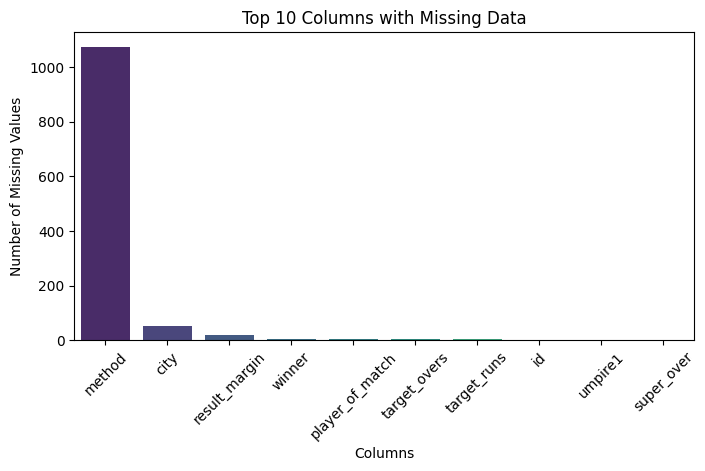

In [17]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data_top_10 = missing_data.head(10)
# Plot the barplot
plt.figure(figsize=(8, 4))  # Adjust figure size for better readability
sns.barplot(x=missing_data_top_10.index, y=missing_data_top_10['Total'], palette="viridis")

# Add labels and title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Top 10 Columns with Missing Data')

# Show the plot
plt.show()

In [18]:
data=data.drop(['method'],axis=1)
data=data.drop(['id'],axis=1)
data=data.drop(['date'],axis=1)
data=data.drop(['super_over'],axis=1)
data=data.drop(['result_margin'],axis=1)
data=data.drop(['match_type'],axis=1)
data=data.drop(['season'],axis=1)
data=data.drop(['result'],axis=1)


In [19]:
data['city'].fillna('Unknown', inplace=True)
columns_to_fill = ['player_of_match']
data[columns_to_fill] = data[columns_to_fill].fillna('Not Available')

In [20]:
data.head(5)

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,target_runs,target_overs,umpire1,umpire2
0,Bangalore,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223.0,20.0,Asad Rauf,RE Koertzen
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,241.0,20.0,MR Benson,SL Shastri
2,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,130.0,20.0,Aleem Dar,GA Pratapkumar
3,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,166.0,20.0,SJ Davis,DJ Harper
4,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,111.0,20.0,BF Bowden,K Hariharan


In [21]:
data.shape


(1095, 12)

# **Understanding our data**

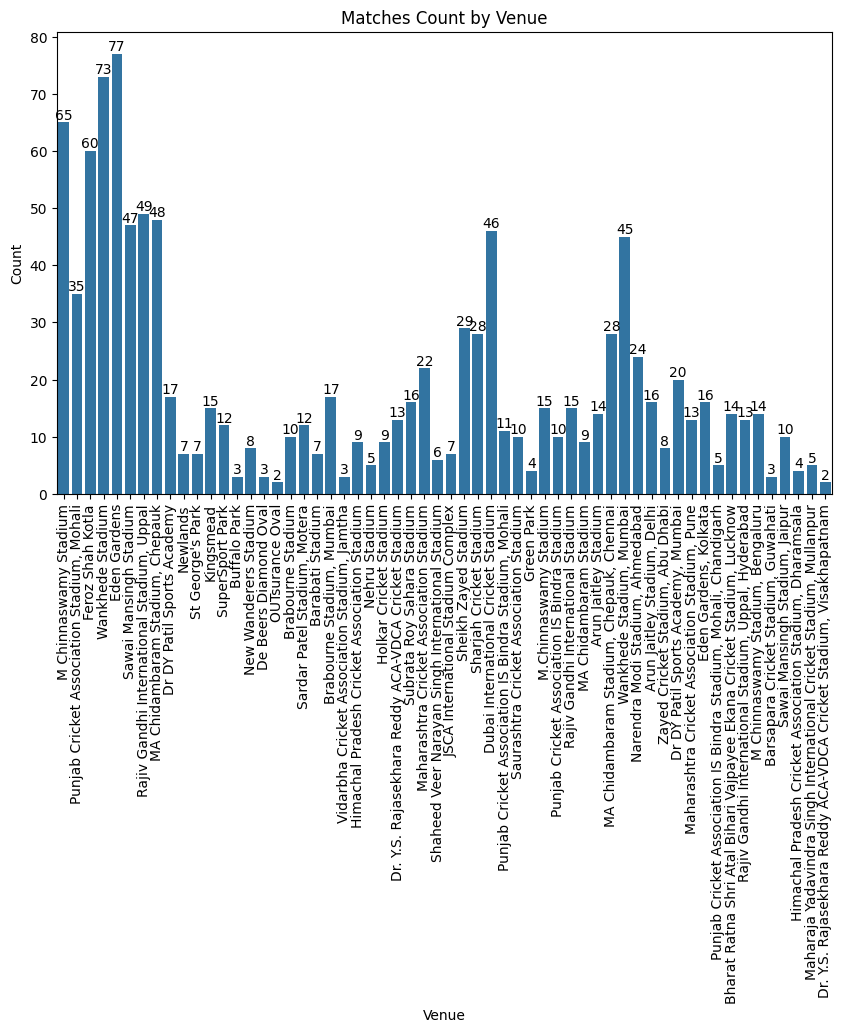

In [22]:
plt.figure(figsize=(10,6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
ax = sns.countplot(x='venue',data=data)
plt.xticks(rotation=90)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Matches Count by Venue')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

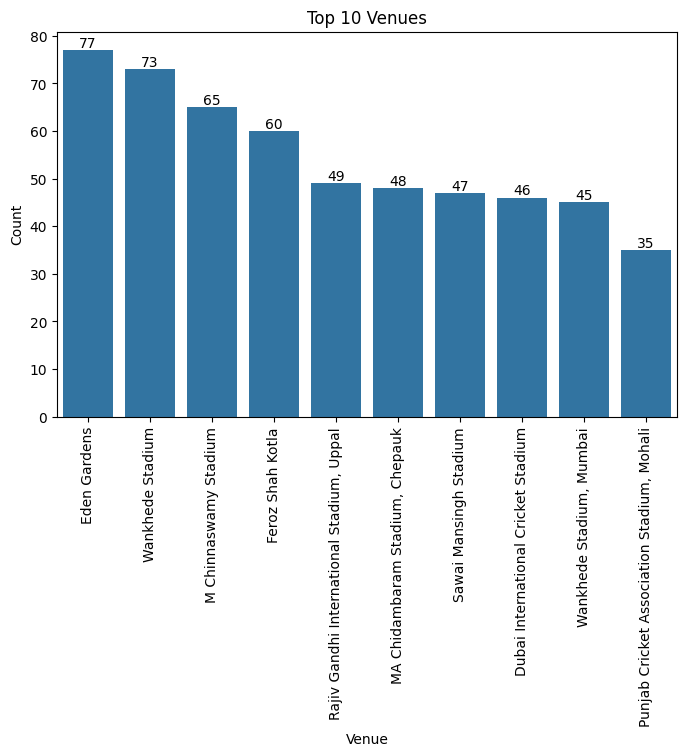

In [23]:
# get the top 10 venues with the highest number of matches played
top_player = data['venue'].value_counts().head(10)

plt.figure(figsize=(8,5))

ax = sns.barplot(x=top_player.index, y=top_player.values)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Top 10 Venues')

plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

Top 5 Highest Scoring Teams:
team1
Mumbai Indians                 43728.0
Sunrisers Hyderabad            42118.0
Delhi Capitals                 41422.0
Kolkata Knight Riders          40557.0
Royal Challengers Bangalore    39807.0
Name: target_runs, dtype: float64 



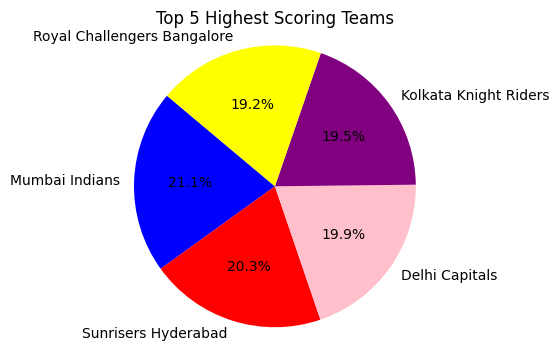

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine the total runs for both batting teams (team1 and team2)
team1_runs = data.groupby('team1')['target_runs'].sum()
team2_runs = data.groupby('team2')['target_runs'].sum()

# Combine both series into one DataFrame and sum their values
total_runs_by_team = team1_runs.add(team2_runs, fill_value=0)

# Sort the teams based on the total runs scored in descending order
top_scoring_teams = total_runs_by_team.sort_values(ascending=False)

# Select the top 5 highest-scoring teams
top_5_teams = top_scoring_teams.head(5)

# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(top_5_teams,"\n")

# Create a pie chart with custom colors
colors = ['blue', 'red', 'pink', 'purple', 'yellow']

plt.figure(figsize=(4, 4))
plt.pie(top_5_teams, labels=top_5_teams.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Highest Scoring Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<ipython-input-25-ea5c5a3ebff2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_player.index, y=top_player.values, palette=colors)


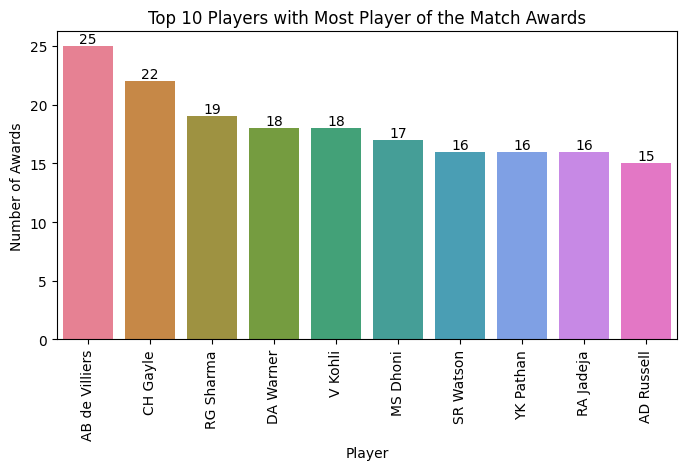

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 players with the highest number of "Player of the Match" awards
top_player = data['player_of_match'].value_counts().head(10)

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(top_player))

# Create a barplot with different colors for each bar
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_player.index, y=top_player.values, palette=colors)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.title('Top 10 Players with Most Player of the Match Awards')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()


<ipython-input-26-d24d71d6d3f7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_player.index, y=top_player.values, palette=colors)


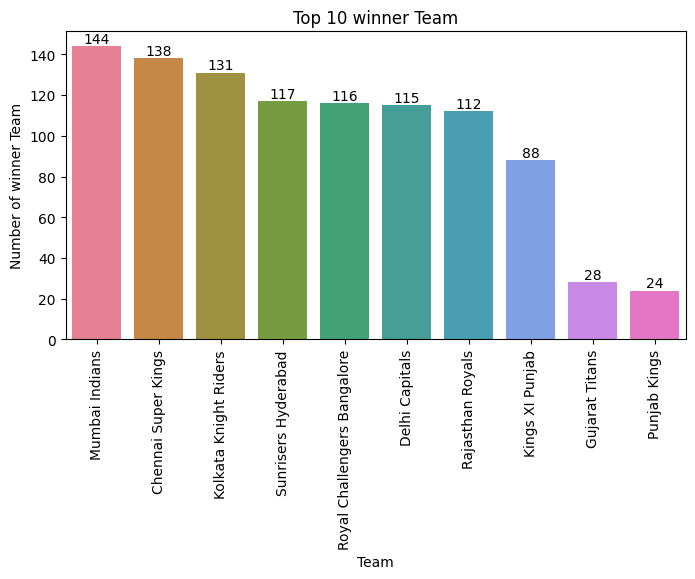

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 players with the highest number of "Player of the Match" awards
top_player = data['winner'].value_counts().head(10)

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(top_player))

# Create a barplot with different colors for each bar
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_player.index, y=top_player.values, palette=colors)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Number of winner Team')
plt.title('Top 10 winner Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()


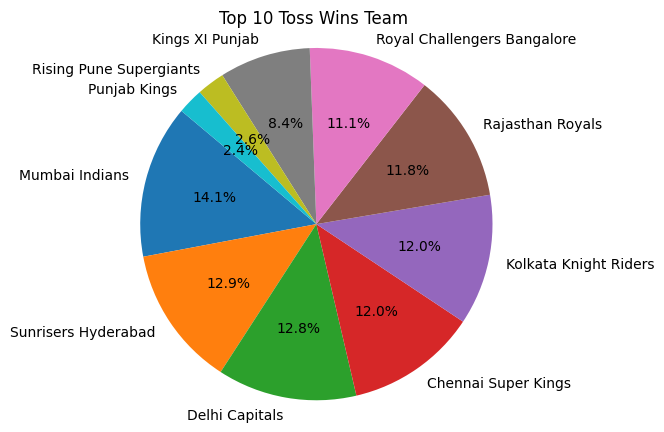

In [27]:
import matplotlib.pyplot as plt

# Assuming 'matches' is your DataFrame with a column 'toss_winner'

# Calculate the frequency of each toss winner
toss_winner_counts = data['toss_winner'].value_counts().head(10)

# Define colors for the pie chart
colors = plt.get_cmap('tab10').colors

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(toss_winner_counts, labels=toss_winner_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Toss Wins Team ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()


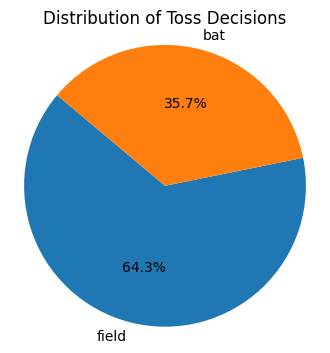

In [28]:
import matplotlib.pyplot as plt

# Calculate the frequency of each toss decision
toss_decision_counts = data['toss_decision'].value_counts()

# Define colors for the pie chart
colors = plt.get_cmap('tab10').colors

# Create a pie chart for toss decisions
plt.figure(figsize=(4, 4))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Toss Decisions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()


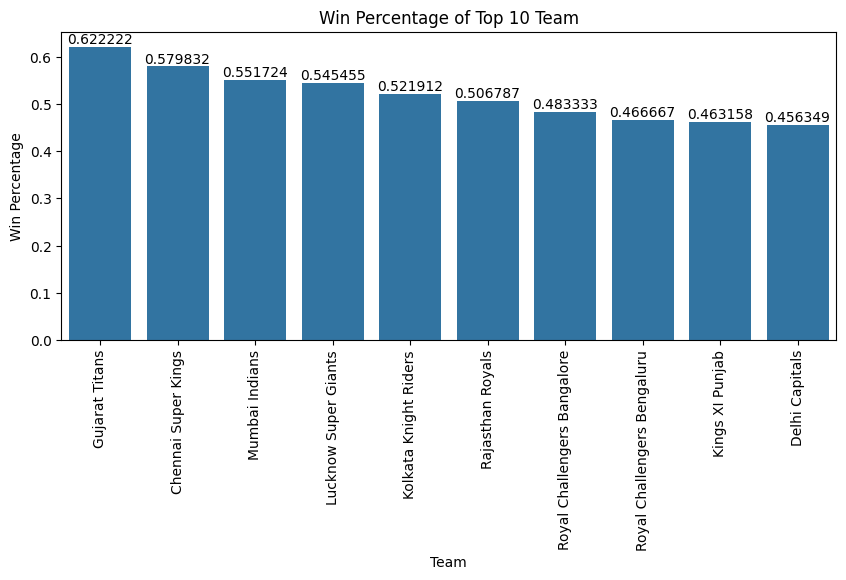

In [29]:
# Calculate win percentage for each team
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins/team_matches).sort_values(ascending=False).head(10)

# Plot win percentage for each team
plt.figure(figsize=(10,4))
ax = sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Top 10 Team')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [30]:
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiantss', 'Punjab Kings', 'Lucknow Super Giants',
       'Gujarat Titans', 'Royal Challengers Bengaluru'], dtype=object)

# **Data Preparation**

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame

# Initialize the LabelEncoder
label_encoders = {}
for column in ['city', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'umpire1', 'umpire2']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))  # Convert to string to handle any potential issues with mixed types
    label_encoders[column] = le  # Save the label encoder for future use

# Verify the changes
print(data.head())


   city  player_of_match  venue  team1  team2  toss_winner  toss_decision  \
0     2               37     23     13      6           13              1   
1     7              149     40      4      0            0              0   
2    10              150     16      1     10           10              0   
3    26              167     55      8     13            8              0   
4    23               57     14      6     15           15              0   

   winner  target_runs  target_overs  umpire1  umpire2  
0       6        223.0          20.0        9       41  
1       0        241.0          20.0       34       52  
2       1        130.0          20.0        8       15  
3      13        166.0          20.0       51       14  
4       6        111.0          20.0       10       24  


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             1095 non-null   int64  
 1   player_of_match  1095 non-null   int64  
 2   venue            1095 non-null   int64  
 3   team1            1095 non-null   int64  
 4   team2            1095 non-null   int64  
 5   toss_winner      1095 non-null   int64  
 6   toss_decision    1095 non-null   int64  
 7   winner           1095 non-null   int64  
 8   target_runs      1092 non-null   float64
 9   target_overs     1092 non-null   float64
 10  umpire1          1095 non-null   int64  
 11  umpire2          1095 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 102.8 KB


# **Splitting the Data**

In [33]:
y= data['winner']
X= data.drop('winner', axis=1)


In [35]:
data=data.fillna(method='ffill')

In [36]:
data.isnull().sum()

city               0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
target_runs        0
target_overs       0
umpire1            0
umpire2            0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training the Model**

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
# Scaling features between -1 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
!pip install scikit-plot


Model:  Logistic Regression
Validation Accuracy:  0.2237442922374429
Training Accuracy:  0.2773972602739726


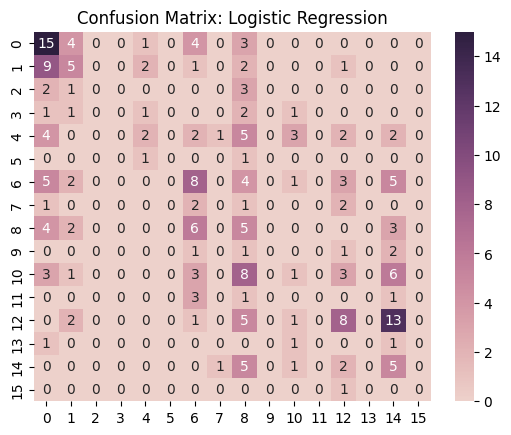

Model:  Decision Tree Classifier
Validation Accuracy:  0.365296803652968
Training Accuracy:  1.0


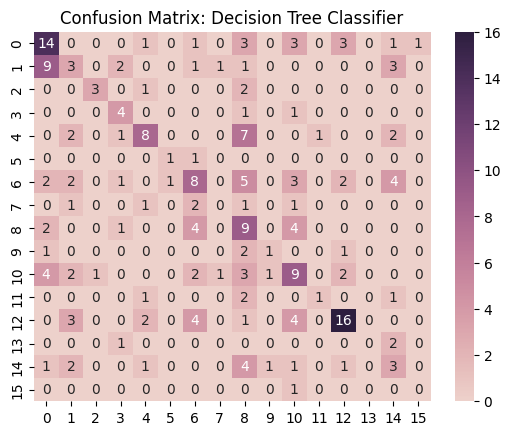

Model:  Random Forest
Validation Accuracy:  0.45662100456621
Training Accuracy:  1.0


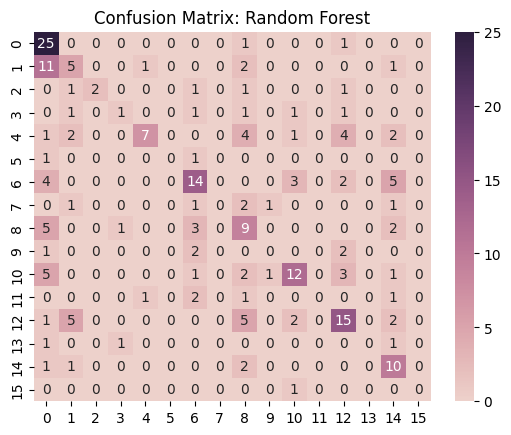

Model:  Linear Discriminant Analyzer
Validation Accuracy:  0.2237442922374429
Training Accuracy:  0.2751141552511416


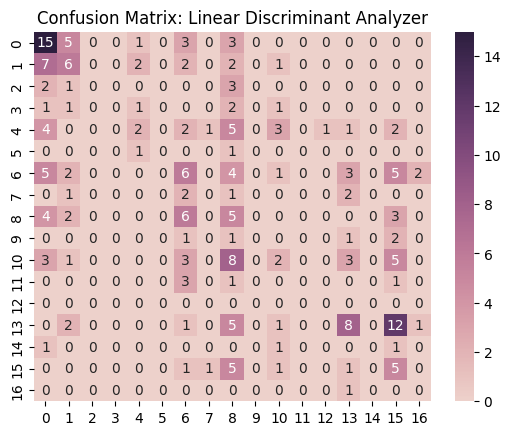

Model:  Ada Boost
Validation Accuracy:  0.1780821917808219
Training Accuracy:  0.21575342465753425


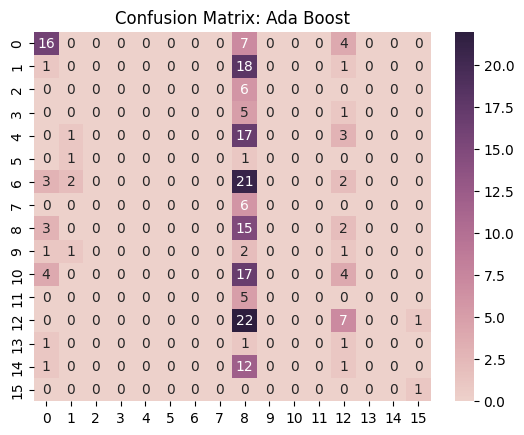

Model:  XGBClassifier
Validation Accuracy:  0.3287671232876712
Training Accuracy:  1.0


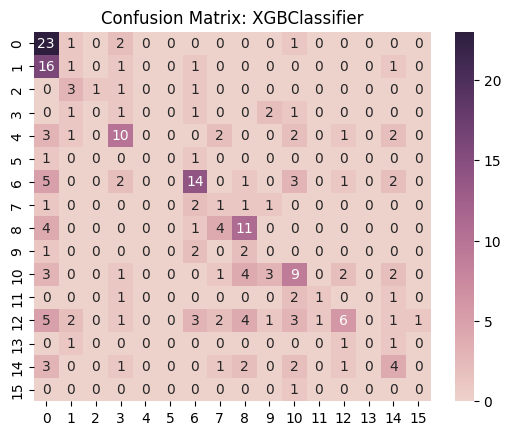

Model:  Gradient Boosting
Validation Accuracy:  0.4931506849315068
Training Accuracy:  0.9988584474885844


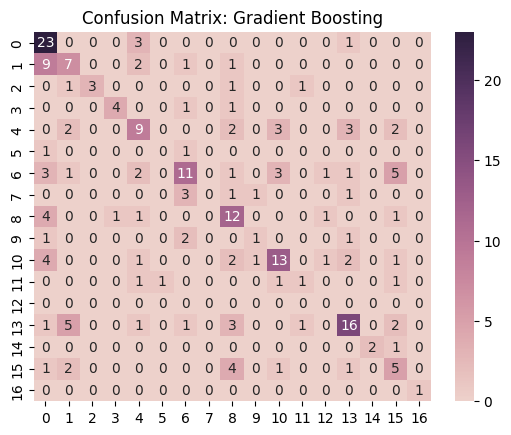

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 11
[LightGBM] [Info] Start training from score -2.065836
[LightGBM] [Info] Start training from score -2.221489
[LightGBM] [Info] Start training from score -4.829456
[LightGBM] [Info] Start training from score -3.684324
[LightGBM] [Info] Start training from score -2.570673
[LightGBM] [Info] Start training from score -5.389072
[LightGBM] [Info] Start training from score -2.140637
[LightGBM] [Info] Start training from score -3.884994
[LightGBM] [Info] Start training from score -1.955085
[LightGBM] [Info] Start training from score -3.830927
[LightGBM] [Info] Start training from score -2.309458
[LightGBM] [Info] Start training from score -3.942153
[LightGBM] [Info] Start training from score -5.165928
[LightGBM] [

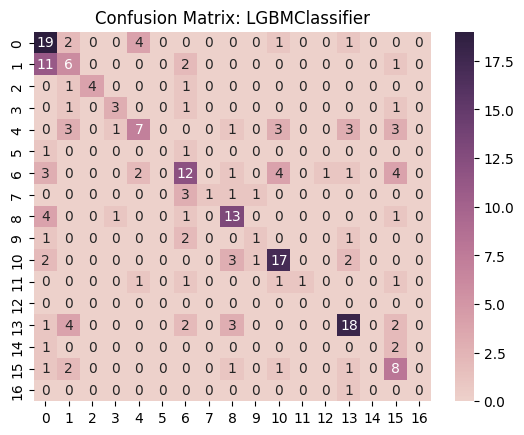

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier as lgb

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
    ('Ada Boost', AdaBoostClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LGBMClassifier', LGBMClassifier())
    # ('SVC', SVC())  # Uncomment if you want to use SVC
]

models_score = []
for name, model in models:
    # Fit the model
    model.fit(X_train_imputed, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_imputed)

    # Calculate accuracy
    val_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train_imputed))

    # Append scores
    models_score.append([name, val_accuracy])

    # Print accuracies
    print("Model: ", name)
    print('Validation Accuracy: ', val_accuracy)
    print('Training Accuracy: ', train_accuracy)

    # Plot confusion matrix
    plt.figure()
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 11
[LightGBM] [Info] Start training from score -2.065836
[LightGBM] [Info] Start training from score -2.221489
[LightGBM] [Info] Start training from score -4.829456
[LightGBM] [Info] Start training from score -3.684324
[LightGBM] [Info] Start training from score -2.570673
[LightGBM] [Info] Start training from score -5.389072
[LightGBM] [Info] Start training from score -2.140637
[LightGBM] [Info] Start training from score -3.884994
[LightGBM] [Info] Start training from score -1.955085
[LightGBM] [Info] Start training from score -3.830927
[LightGBM] [Info] Start training from score -

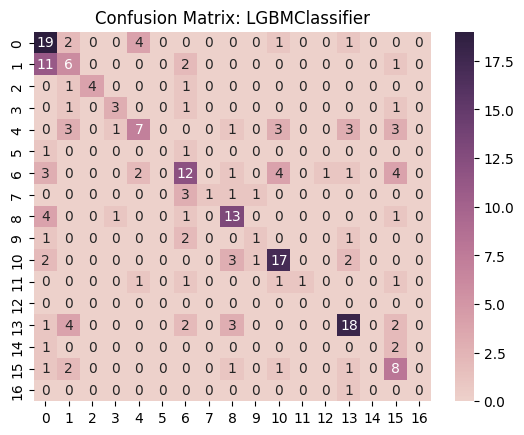

Model saved as 'lgbm_model.pkl' in Google Drive
Model loaded from 'lgbm_model.pkl' in Google Drive


In [45]:
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the LGBMClassifier model with hyperparameters
model = lgb.LGBMClassifier(
    boosting_type='gbdt',       # The type of boosting algorithm to use ('gbdt': Gradient Boosting Decision Tree)
    num_leaves=31,              # Number of leaves in one tree (default: 31)
    max_depth=-1,               # Maximum tree depth for base learners (-1 means no limit, default: -1)
    learning_rate=0.1,          # Learning rate or shrinkage rate to prevent overfitting (default: 0.1)
    n_estimators=100            # Number of boosting iterations (default: 100)
)

# Fit the model on the training data
model.fit(X_train_imputed, y_train)

# Predict on test set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train_imputed))

# Print accuracies
print('Validation Accuracy: ', val_accuracy)
print('Training Accuracy: ', train_accuracy)

# Plot confusion matrix
plt.figure()
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix: LGBMClassifier')
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

# Save the model to Google Drive
model_path = '/content/drive/MyDrive/Jupyter Notebook Research Code/IPL Prediction /lgbm_model.pkl'
joblib.dump(model, model_path)

print("Model saved as 'lgbm_model.pkl' in Google Drive")

# Load the model from Google Drive
loaded_model = joblib.load(model_path)

print("Model loaded from 'lgbm_model.pkl' in Google Drive")
